# Analysis

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc={'figure.figsize':(12,8)})
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [108]:
data = pd.read_csv('/kaggle/input/titanic3/train_1.csv')
dataset= data.copy()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone
0,1,0,3,0,22.0,1,0,0.916454,0,0,0,4,1,1,66.0,0.000000,0
1,2,1,1,1,38.0,1,0,1.859038,1,1,2,6,4,1,38.0,0.000000,0
2,3,1,3,1,26.0,0,0,0.950608,0,0,1,5,1,0,78.0,0.950608,1
3,4,1,1,1,35.0,1,0,1.733197,0,1,2,6,4,1,35.0,0.000000,0
4,5,0,3,0,35.0,0,0,0.956649,0,0,0,6,1,0,105.0,0.956649,1


In [109]:
dataset['temp']=(2*dataset['Pclass']*dataset['Alone'])

## Train And test Dataset

In [110]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)
cat_columns = []
cat_columns = ['Sex', 'Age_Group', 'Title','Pclass','Cabin_Provided','Embarked']
#cat_columns = ['Sex','Pclass','Title',]
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Cabin_Provided' 'Title' 'Age_Group' 'Fare_Group'
 'Total_Members' 'Age_Class' 'fare_per_person' 'Alone' 'temp']
 Dropped Columns : ['Survived', 'PassengerId']
Cateogrical Columns : ['Sex', 'Age_Group', 'Title', 'Pclass', 'Cabin_Provided', 'Embarked'] 
 Numerical Columns : ['temp', 'SibSp', 'Age', 'Parch', 'fare_per_person', 'Total_Members', 'Fare_Group', 'Age_Class', 'Fare', 'Alone']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone,temp
0,3,0,22.0,1,0,0.916454,0,0,0,4,1,1,66.0,0.000000,0,0
1,1,1,38.0,1,0,1.859038,1,1,2,6,4,1,38.0,0.000000,0,0
2,3,1,26.0,0,0,0.950608,0,0,1,5,1,0,78.0,0.950608,1,6
3,1,1,35.0,1,0,1.733197,0,1,2,6,4,1,35.0,0.000000,0,0
4,3,0,35.0,0,0,0.956649,0,0,0,6,1,0,105.0,0.956649,1,6


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
#x.loc[:,num_columns] = scaler.fit_transform(x[num_columns])
x = scaler.fit_transform(x)
x

array([[ 0.90629943, -0.76584388, -0.52023048, ..., -1.05650911,
        -1.13348562, -1.00705974],
       [-1.48565346,  1.30574915,  0.63187767, ..., -1.05650911,
        -1.13348562, -1.00705974],
       [ 0.90629943,  1.30574915, -0.23220344, ...,  0.45487246,
         0.8822344 ,  1.27661535],
       ...,
       [-1.48565346,  1.30574915, -0.73625076, ...,  1.31462184,
         0.8822344 , -0.24583471],
       [-1.48565346, -0.76584388, -0.23220344, ...,  1.31462184,
         0.8822344 , -0.24583471],
       [ 0.90629943, -0.76584388,  0.19983712, ...,  0.44119896,
         0.8822344 ,  1.27661535]])

In [113]:
'''vif = pd.DataFrame()
vif["variables"] = cols_to_inc
vif["VIF"] = [variance_inflation_factor(x, i) for i in range(len(cols_to_inc))]
vif'''

'vif = pd.DataFrame()\nvif["variables"] = cols_to_inc\nvif["VIF"] = [variance_inflation_factor(x, i) for i in range(len(cols_to_inc))]\nvif'

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=33)

In [115]:
y_train.sum()/y_train.shape[0],y_test.sum()/y_test.shape[0]

(0.4095744680851064, 0.4084507042253521)

# Modelling

In [116]:
'''from imblearn.under_sampling import RandomUnderSampler as UnderSampler
from imblearn.over_sampling import RandomOverSampler as OverSampler

us = UnderSampler()

x_dn,y_dn = us.fit_sample(x,y)
print(x_dn.shape,y_dn.shape)

us = OverSampler()
x_up,y_up = us.fit_sample(x,y)
print(x_up.shape,y_up.shape)'''

'from imblearn.under_sampling import RandomUnderSampler as UnderSampler\nfrom imblearn.over_sampling import RandomOverSampler as OverSampler\n\nus = UnderSampler()\n\nx_dn,y_dn = us.fit_sample(x,y)\nprint(x_dn.shape,y_dn.shape)\n\nus = OverSampler()\nx_up,y_up = us.fit_sample(x,y)\nprint(x_up.shape,y_up.shape)'

In [117]:
'''x=x_up.copy()
y=y_up.copy()'''

'x=x_up.copy()\ny=y_up.copy()'

In [118]:
'''from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,StratifiedShuffleSplit
cv = KFold(n_splits=5)
scv = StratifiedKFold(n_splits=5)

print('KFold not Stratified')
for train_idx,test_idx in cv.split(y):
    #print(y[train_idx].shape[0],y[test_idx].shape[0])
    print(y[train_idx].sum(),y[test_idx].sum())

print('StratifiedKFold')
for train_idx,test_idx in scv.split(x,y):
    #print(y[train_idx].shape[0],y[test_idx].shape[0])
    print(y[train_idx].sum(),y[test_idx].sum())'''

"from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,StratifiedShuffleSplit\ncv = KFold(n_splits=5)\nscv = StratifiedKFold(n_splits=5)\n\nprint('KFold not Stratified')\nfor train_idx,test_idx in cv.split(y):\n    #print(y[train_idx].shape[0],y[test_idx].shape[0])\n    print(y[train_idx].sum(),y[test_idx].sum())\n\nprint('StratifiedKFold')\nfor train_idx,test_idx in scv.split(x,y):\n    #print(y[train_idx].shape[0],y[test_idx].shape[0])\n    print(y[train_idx].sum(),y[test_idx].sum())"

**SVM**

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score,precision_score,confusion_matrix,accuracy_score,classification_report,precision_recall_curve,average_precision_score

In [120]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV,cross_val_score

In [121]:
scv = StratifiedKFold(4,random_state=33, shuffle=True)
cv = KFold(4,random_state=33,shuffle=True)

In [122]:
'''model = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
#model = model.fit(x_train,y_train)
metric_names = ['f1','roc_auc','average_precision','accuracy','precision','recall']
scored_df = pd.DataFrame(index=metric_names,columns=['Random','Stratified'])
for metric in metric_names:
    score1 = cross_val_score(model,x,y,scoring=metric,cv=cv).mean()
    score2 = cross_val_score(model,x,y,scoring=metric,cv=scv).mean()
    scored_df.loc[metric,'Random'] = score1
    scored_df.loc[metric,'Stratified'] = score2
    
    
scored_df
'''

"model = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)\n#model = model.fit(x_train,y_train)\nmetric_names = ['f1','roc_auc','average_precision','accuracy','precision','recall']\nscored_df = pd.DataFrame(index=metric_names,columns=['Random','Stratified'])\nfor metric in metric_names:\n    score1 = cross_val_score(model,x,y,scoring=metric,cv=cv).mean()\n    score2 = cross_val_score(model,x,y,scoring=metric,cv=scv).mean()\n    scored_df.loc[metric,'Random'] = score1\n    scored_df.loc[metric,'Stratified'] = score2\n    \n    \nscored_df\n"

In [132]:
from sklearn import metrics 


clf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print('Train Accuracy :', accuracy_score(y_train,clf.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)


print('--confusion Matrix--')
cm = pd.DataFrame(index=['0','1'],columns=['0','1'],data=confusion_matrix(y_test,y_pred,labels=[0,1]))
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))



Train Accuracy : 99.47 ROC : 99.99
Test Accuracy : 82.39 ROC : 88.29
--confusion Matrix--
    0   1
0  73  11
1  14  44
--classification report--
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        84
           1       0.80      0.76      0.78        58

    accuracy                           0.82       142
   macro avg       0.82      0.81      0.82       142
weighted avg       0.82      0.82      0.82       142



In [133]:
f1_score(y_test,y_pred)

0.7787610619469026

[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

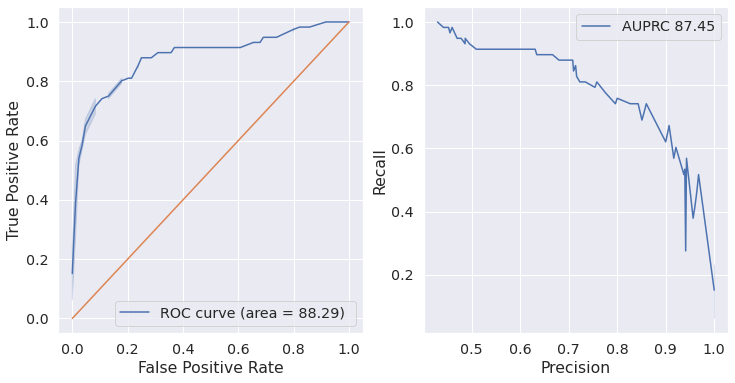

In [134]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
fpr,tpr,threshold = roc_curve(y_test,y_proba)
#sns.set(rc={'figure.figsize':(12,12)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
f1 = sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100) , ax=axes[0])
sns.lineplot(x=[0,1],y=[0,1],markers='--',ax=axes[0])
f1.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
f2 =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100),ax=axes[1])
f2.set(xlabel='Precision',ylabel='Recall')

In [153]:
metric_names = ['f1','roc_auc','average_precision','accuracy','precision','recall','f1_weighted']
scored_df = pd.DataFrame(index=metric_names,columns=['Mean','Std','Min','Max'])
for metric in metric_names:
    score = cross_validate(clf,x,y,scoring=metric,cv=scv,n_jobs=3)
    #print(score)
    scored_df.loc[metric,'Mean'] = np.mean(score['test_score']).round(4)*100
    scored_df.loc[metric,'Std'] = np.std(score['test_score']).round(4)*100
    scored_df.loc[metric,'Min'] = np.min(score['test_score']).round(4)*100
    scored_df.loc[metric,'Max'] = np.max(score['test_score']).round(4)*100
    
#cv_score =cross_validate(clf,x,y,scoring=['roc_auc','accuracy','f1_weighted'],cv=scv,n_jobs=3,verbose=1)
scored_df

,Mean,Std,Min,Max
f1,76.84,3.38,72.34,81.43
roc_auc,87.07,2.24,83.46,89.56
average_precision,83.88,2.87,80.59,88.24
accuracy,81.45,2.87,77.84,85.23
precision,78.72,4.19,73.91,83.82
recall,75.09,2.95,70.83,79.17
f1_weighted,81.37,2.86,77.76,85.16


In [179]:
cols_to_inc[i] for i in indi

TypeError: only integer scalar arrays can be converted to a scalar index

In [178]:
importance = clf.feature_importances_
indices = np.argsort(importance)
#imp = pd.DataFrame(index=cols_to_inc[indices],data=importancetance[indices])

### Grid Search, Randomized Search

In [131]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [155]:
#, 'rbf', 'poly'
parameters = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25],
              "min_samples_split" : [2, 4, 10, 12, 16],
              "n_estimators": [10,100, 400, 700]}


In [156]:
cv_model = GridSearchCV(clf,parameters,verbose=1,scoring='f1',n_jobs=-1,cv=scv,verbose=1)
cv_model.fit(x,y)


Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.8min finished
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=33, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [10, 100, 400, 700]},
             scoring='f1', verbose=1)

In [157]:
cv_model.best_params_,cv_model.best_score_

({'criterion': 'gini',
  'min_samples_leaf': 1,
  'min_samples_split': 12,
  'n_estimators': 10},
 0.7839918882599528)

In [158]:
y_pred = cv_model.predict(x_test)
y_proba = cv_model.predict_proba(x_test)[:,1]

print('Train Accuracy :', accuracy_score(y_train,cv_model.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,cv_model.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)


print('--confusion Matrix--')
cm = pd.DataFrame(index=['0','1'],columns=['0','1'],data=confusion_matrix(y_test,y_pred,labels=[0,1]))
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))



Train Accuracy : 87.77000000000001 ROC : 95.77
Test Accuracy : 88.73 ROC : 97.09
--confusion Matrix--
    0   1
0  77   7
1   9  49
--classification report--
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        84
           1       0.88      0.84      0.86        58

    accuracy                           0.89       142
   macro avg       0.89      0.88      0.88       142
weighted avg       0.89      0.89      0.89       142



[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

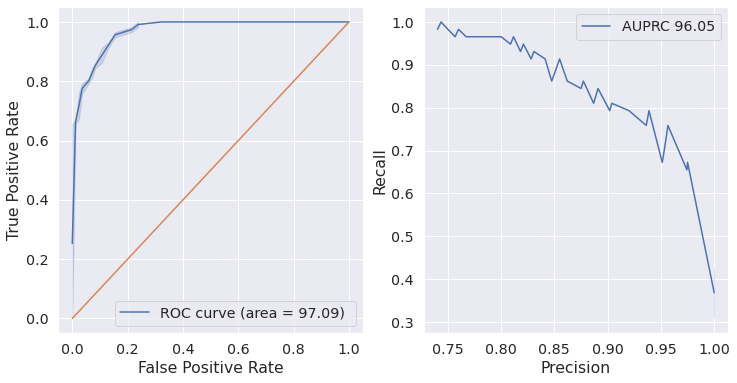

In [159]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
fpr,tpr,threshold = roc_curve(y_test,y_proba)
#sns.set(rc={'figure.figsize':(12,12)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
f1 = sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100) , ax=axes[0])
sns.lineplot(x=[0,1],y=[0,1],markers='--',ax=axes[0])
f1.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
f2 =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100),ax=axes[1])
f2.set(xlabel='Precision',ylabel='Recall')

## Create Submission

In [160]:
test_data = pd.read_csv('/kaggle/input/titanic3/test_1.csv')
test_data['temp']= (2*test_data['Pclass']*test_data['Alone'])
#test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
#test_data = encoder.transform(test_data)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone,temp
0,3,0,34.50,0,0,0.945921,2,0,0,5,1,0,103.50,0.945921,1,6
1,3,1,47.00,1,0,0.903090,0,0,2,7,1,1,141.00,0.000000,0,0
2,2,0,62.00,0,0,1.028876,2,0,0,8,2,0,124.00,1.028876,1,4
3,3,0,27.00,0,0,0.985090,0,0,0,5,2,0,81.00,0.985090,1,6
4,3,1,22.00,1,1,1.123443,0,0,2,4,2,2,66.00,0.000000,0,0
5,3,0,14.00,0,0,1.009663,0,0,0,3,2,0,42.00,1.009663,1,6
6,3,1,30.00,0,0,0.935971,2,0,1,5,1,0,90.00,0.935971,1,6
7,2,0,26.00,1,1,1.477121,0,0,0,5,3,2,52.00,0.000000,0,0
8,3,1,18.00,0,0,0.915358,1,0,2,3,1,0,54.00,0.915358,1,6
9,3,0,21.00,2,0,1.400538,0,0,0,4,3,2,63.00,0.000000,0,0


In [161]:
#test_data.loc[:,num_columns]=scaler.transform(test_data[num_columns])
test_data=scaler.transform(test_data)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


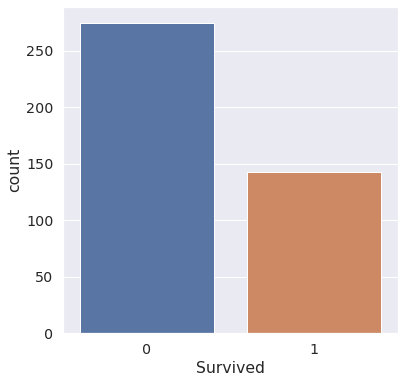

In [162]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': cv_model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')
print(result.head())
sns.countplot(result['Survived'])

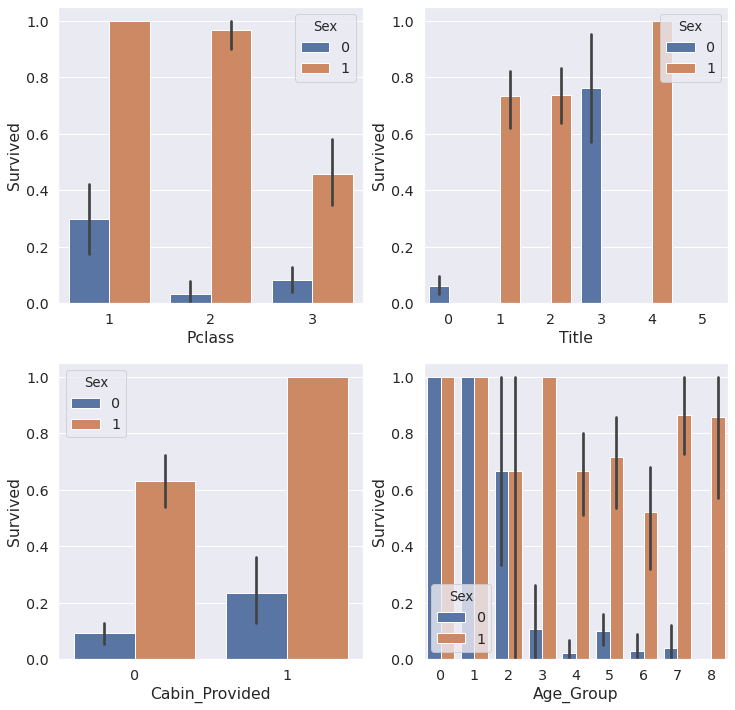

In [165]:
test_data = pd.read_csv('/kaggle/input/titanic3/test_1.csv')
test_data['Survived'] = result['Survived']
fig,ax = plt.subplots(2,2,figsize=(12, 12))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=test_data,ax=ax[0,0])
sns.barplot(x='Title',y='Survived',hue='Sex',data=test_data,ax=ax[0,1])
sns.barplot(x='Cabin_Provided',y='Survived',hue='Sex',data=test_data,ax=ax[1,0])
sns.barplot(x='Age_Group',y='Survived',hue='Sex',data=test_data,ax=ax[1,1])

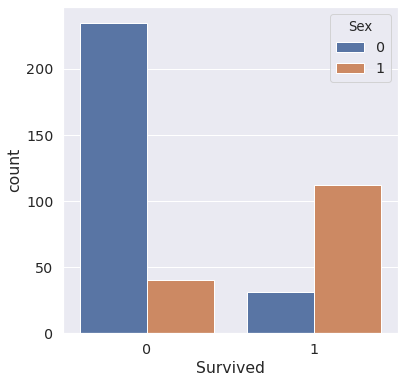

In [166]:
sns.countplot(x='Survived',hue='Sex',data=test_data)

In [170]:
test_data[(test_data.Survived == 0) & (test_data.Age_Group == 5) & (test_data.Sex == 0)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone,Survived
0,892,3,0,34.5,0,0,0.945921,2,0,0,5,1,0,103.5,0.945921,1,0
3,895,3,0,27.0,0,0,0.985090,0,0,0,5,2,0,81.0,0.985090,1,0
7,899,2,0,26.0,1,1,1.477121,0,0,0,5,3,2,52.0,0.000000,0,0
10,902,3,0,29.0,0,0,0.949185,0,0,0,5,1,0,87.0,0.949185,1,0
29,921,3,0,29.0,2,0,1.355628,1,0,0,5,3,2,87.0,0.000000,0,0
38,930,3,0,25.0,0,0,1.021189,0,0,0,5,2,0,75.0,1.021189,1,0
39,931,3,0,29.0,0,0,1.759636,0,0,0,5,4,0,87.0,1.759636,1,0
45,937,3,0,25.0,0,0,0.950608,0,0,0,5,2,0,75.0,0.950608,1,0
47,939,3,0,29.0,0,0,0.942008,2,0,0,5,1,0,87.0,0.942008,1,0
51,943,2,0,27.0,0,0,1.205023,1,0,0,5,3,0,54.0,1.205023,1,0


array([0.06335353, 0.13546425, 0.11285486, 0.02136452, 0.01398573,
       0.13014964, 0.01792485, 0.02800134, 0.12888568, 0.04119449,
       0.02914477, 0.03765533, 0.14888231, 0.07016886, 0.00473378,
       0.01623607])

In [ ]:
result.to_csv('Prediction_72.csv',index=False)